Target variables: 

- xyz_vaccine -> Whether respondent received xyz flu vaccine
- seasonal_vaccine -> Whether respondent received seasonal flu vaccine.

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [25]:
df= pd.read_csv('training_set_features.csv', index_col='respondent_id')
df.iloc[:,20:25]

,opinion_seas_sick_from_vacc,age_group,education,race,sex
respondent_id,,,,,
0,2.0,55 - 64 Years,< 12 Years,White,Female
1,4.0,35 - 44 Years,12 Years,White,Male
2,2.0,18 - 34 Years,College Graduate,White,Male
3,1.0,65+ Years,12 Years,White,Female
4,4.0,45 - 54 Years,Some College,White,Female
...,...,...,...,...,...
26702,2.0,65+ Years,Some College,White,Female
26703,1.0,18 - 34 Years,College Graduate,White,Male
26704,2.0,55 - 64 Years,Some College,White,Female


In [26]:
df_1 = df.copy()
df_1.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [27]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26615 non-null  float64
 1   xyz_knowledge                26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

In [28]:
df_1.select_dtypes(include=['object'])


,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN


In [29]:
print(df_1.isnull().sum().sort_values(ascending=False).head(20))
df_1.columns

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_xyz_sick_from_vacc       395
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
household_children               249
dtype: int64


Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [30]:
df_2 = df_1.drop(columns=['employment_occupation','employment_industry','health_insurance'], axis=1)
df_2

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0


In [31]:
df_2.age_group
df_2.age_group.isnull().sum()

0

In [32]:
def is_float(series):
    try:
        float(series)
    except:
        return False
    return True

In [33]:
all_ranges = df_2[df_2['age_group'].apply(is_float)==False]
all_ranges['age_group']

respondent_id
0        55 - 64 Years
1        35 - 44 Years
2        18 - 34 Years
3            65+ Years
4        45 - 54 Years
             ...      
26702        65+ Years
26703    18 - 34 Years
26704    55 - 64 Years
26705    18 - 34 Years
26706        65+ Years
Name: age_group, Length: 26707, dtype: object

In [34]:
# def convert_to_avg(series):
#     parts = series.split('-')
#     if(len(parts)==2):
#         return (float(parts[0]) + float(parts[1]))/2
#     try:
#         return float(series)
#     except:
#         return None

In [35]:
def convert_age_group(age_group):
        # Split the string by ' - ' to get the lower and upper bounds
        parts = age_group.replace(' Years', '').split(' - ')
        if len(parts) == 2:
            return (float(parts[0]) + float(parts[1])) / 2
        # Handle the '65+ Years' case
        elif '65+' in age_group:
            return 65.0
        else:
            return None
        # return series.apply(convert_age_group)

In [36]:
df_3 = df_2.copy()
df_3['age_group'] = df_3['age_group'].apply(convert_age_group)
df_3['age_group']

respondent_id
0        59.5
1        39.5
2        26.0
3        65.0
4        49.5
         ... 
26702    65.0
26703    26.0
26704    59.5
26705    26.0
26706    65.0
Name: age_group, Length: 26707, dtype: float64

In [37]:
df_3.age_group.isnull().sum()

0

In [38]:
df_3.isnull().sum().sort_values()

census_msa                        0
hhs_geo_region                    0
sex                               0
race                              0
age_group                         0
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_antiviral_meds        71
behavioral_outside_home          82
behavioral_large_gatherings      87
xyz_concern                      92
xyz_knowledge                   116
behavioral_touch_face           128
behavioral_avoidance            208
household_adults                249
household_children              249
opinion_xyz_risk                388
opinion_xyz_vacc_effective      391
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
health_worker                   804
child_under_6_months            820
chronic_med_condition           971
education                      1407
marital_status                 1408
employment_status           

In [39]:
df_3.select_dtypes(include=['object']).count()

education            25300
race                 26707
sex                  26707
income_poverty       22284
marital_status       25299
rent_or_own          24665
employment_status    25244
hhs_geo_region       26707
census_msa           26707
dtype: int64

In [40]:
df_3['sex'].dtype
gender = {'Male':0,'Female':1}
df_3['sex'] = df_3['sex'].astype('category')
df_3['sex'].dtype
df_3['sex'] = df_3['sex'].map(gender)
df_3['sex']
# df_2['sex']
# // 0: female 1: male

respondent_id
0        1
1        0
2        0
3        1
4        1
        ..
26702    1
26703    0
26704    1
26705    1
26706    0
Name: sex, Length: 26707, dtype: category
Categories (2, int64): [1, 0]

In [41]:
df_3

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,1,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,0,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,0,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,1,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,1,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,1,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,0,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,1,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0


In [42]:
df_3.select_dtypes(include=['object']).count()

education            25300
race                 26707
income_poverty       22284
marital_status       25299
rent_or_own          24665
employment_status    25244
hhs_geo_region       26707
census_msa           26707
dtype: int64

In [43]:
df_4 = df_3.copy()
df_4.education.value_counts()
df_4.education.isnull().sum()
# df_4.education.unique()

1407

In [44]:
df_4.education.dtype
df_4['education'] = df_3['education'].astype('category')
df_4 = df_4.dropna(subset=['education','income_poverty'])
df_4.education.isnull().sum()
# apply ordinal encoder
poverty = ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000']
edu = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
ordina = OrdinalEncoder(categories=[edu,poverty])
ordina.fit_transform(df_4[['education','income_poverty']])
print(pd.DataFrame(ordina.fit_transform(df_4[['education','income_poverty']]))[0])
# df_4.education.isnull().sum()
df_4.income_poverty.isnull().sum()
df_4.shape

0        0.0
1        1.0
2        3.0
3        1.0
4        2.0
        ... 
22195    3.0
22196    2.0
22197    3.0
22198    2.0
22199    2.0
Name: 0, Length: 22200, dtype: float64


(22200, 32)

In [45]:
df_5 = df_4.copy()
df_5['education'] =  (pd.DataFrame(ordina.fit_transform(df_4[['education','income_poverty']]))[0])
df_5['income_poverty'] = (pd.DataFrame(ordina.fit_transform(df_4[['education','income_poverty']]))[1])
df_5

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,1,0.0,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,0,0.0,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,0,1.0,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,1,0.0,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,1,1.0,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,1,NaN,Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,1,NaN,Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,0,NaN,Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0


In [46]:
df_5.select_dtypes(include=['object']).count()

race                 22200
marital_status       22116
rent_or_own          22010
employment_status    22138
hhs_geo_region       22200
census_msa           22200
dtype: int64

In [47]:
print(df_5['marital_status'].isnull().sum())
print(df_5['rent_or_own'].isnull().sum())
print(df_5['employment_status'].isnull().sum())
print(df_5['census_msa'].isnull().sum())
print(df_5['hhs_geo_region'].isnull().sum())
df_6 = df_5.copy()
df_6 = df_6.dropna(subset=['marital_status','rent_or_own', 'employment_status','census_msa','hhs_geo_region'])

print(df_6['marital_status'].isnull().sum())
print(df_6['rent_or_own'].isnull().sum())
print(df_6['employment_status'].isnull().sum())
print(df_6['census_msa'].isnull().sum())
print(df_6['hhs_geo_region'].isnull().sum())

# df_6['marital_status'] = df_6['marital_status'].astype('category')
# df_6['rent_or_own'] = df_6['rent_or_own'].astype('category')
# df_6['employment_status'] = df_6['employment_status'].astype('category')
# df_6['census_msa'] = df_6['census_msa'].astype('category')
# df_6.marital_status.dtype
df_6['hhs_geo_region'].unique()
df_6['race'].unique()

84
190
62
0
0
0
0
0
0
0


array(['White', 'Black', 'Hispanic', 'Other or Multiple'], dtype=object)

In [48]:
mari_dict = {'Married':0, 'Not Married':1}
ro_dict = {'Own':0, 'Rent':1}
emp_dict = {'Not in Labor Force':0, 'Employed':1, 'Unemployed':2}
msa_dict = {'Non-MSA':0,'MSA, Not Principle City':1,'MSA, Principle City':2}
hhs_dict = {'oxchjgsf':0, 'bhuqouqj':1, 'qufhixun':2, 'lrircsnp':3, 'atmpeygn':4, 'lzgpxyit':5, 'fpwskwrf':6, 'mlyzmhmf':7, 'dqpwygqj':8, 'kbazzjca':9}
race_dict = {'White':0, 'Black':1, 'Hispanic':2, 'Other or Multiple':3 }

df_6['marital_status'] = df_6['marital_status'].map(mari_dict)
df_6['rent_or_own'] = df_6['rent_or_own'].map(ro_dict)
df_6['employment_status'] = df_6['employment_status'].map(emp_dict)
df_6['census_msa'] = df_6['census_msa'].map(msa_dict)
df_6['hhs_geo_region'] = df_6['hhs_geo_region'].map(hhs_dict)
df_6['race'] = df_6['race'].map(race_dict)

df_6.marital_status
# df_5.marital_status
df_7 = df_6.copy()

In [49]:
df_7
df_7.select_dtypes(include=['object']).count()

Series([], dtype: int64)

In [50]:
df_7.isnull().sum()
df_7
# df_8 = df_7.copy()
# df_8.dropna()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0.0,1,0,0,0,0.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0.0,1,1,1,1,NaN,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0,0,1.0,1,0,1,2,NaN,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0.0,1,1,0,3,2.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,1.0,0,0,1,2,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,1,NaN,1,1,0,6,2.0,3.0,0.0
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,NaN,1,0,0,2,0.0,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,NaN,1,1,1,5,2.0,1.0,0.0


<Axes: ylabel='respondent_id'>

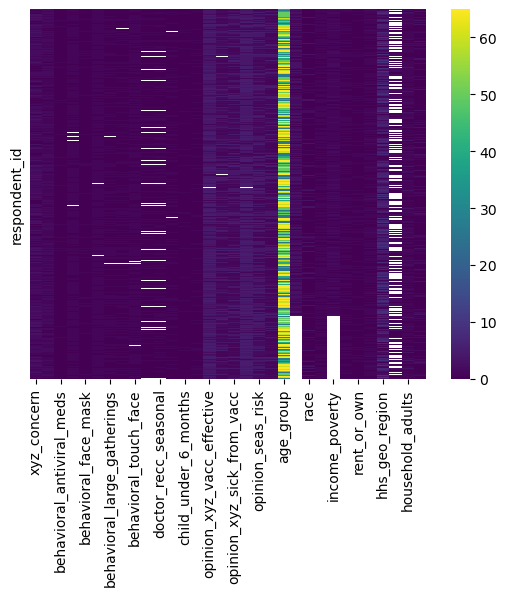

In [51]:
sns.heatmap(df_7, yticklabels=False, cmap='viridis')

In [52]:
df_7.isnull().sum().sort_values()

race                              0
hhs_geo_region                    0
employment_status                 0
rent_or_own                       0
age_group                         0
marital_status                    0
sex                               0
child_under_6_months              2
household_children                6
household_adults                  6
opinion_seas_sick_from_vacc       7
opinion_xyz_sick_from_vacc        7
behavioral_face_mask             10
health_worker                    11
opinion_seas_risk                18
behavioral_wash_hands            21
opinion_seas_vacc_effective      24
opinion_xyz_risk                 26
xyz_concern                      38
behavioral_outside_home          46
behavioral_antiviral_meds        48
behavioral_large_gatherings      59
opinion_xyz_vacc_effective       62
xyz_knowledge                    71
behavioral_touch_face            89
behavioral_avoidance            143
chronic_med_condition           162
doctor_recc_seasonal        

In [53]:
df_7.sex.isnull().sum()

0

In [54]:
# df_8.select_dtypes(include=['object']).count()

In [55]:
# mari = ['Married','Not Married']
# ro = ['Own','Rent']
# emp = ['Not in Labor Force', 'Employed', 'Unemployed']
# msa = ['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'] 
# hhs = ['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
#        'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca']
# # df_5['hhs_geo_region'].value_counts()
# ordina_2 = OrdinalEncoder(categories=[mari,ro,emp,msa])
# ordina_2.fit_transform(df_6[['marital_status','rent_or_own','employment_status','census_msa']])
# pd.DataFrame(ordina_2.fit_transform(df_6[['marital_status','rent_or_own','employment_status','census_msa']]))
# pd.DataFrame(ordina_2.fit_transform(df_6[['marital_status','rent_or_own','employment_status','census_msa']]))[0].dtype
# # df_6['marital_status'].dtype
# df_6['marital_status'] = pd.DataFrame(ordina_2.fit_transform(df_6[['marital_status','rent_or_own','employment_status','census_msa']]))[0]
# df_6['rent_or_own'] = pd.DataFrame(ordina_2.fit_transform(df_6[['marital_status','rent_or_own','employment_status','census_msa']]))[1]
# df_6['employment_status'] = pd.DataFrame(ordina_2.fit_transform(df_6[['marital_status','rent_or_own','employment_status','census_msa']]))[2]
# df_6['census_msa'] = pd.DataFrame(ordina_2.fit_transform(df_6[['marital_status','rent_or_own','employment_status','census_msa']]))[3]
